In [231]:
import pandas as pd
import numpy as np

In [232]:
rate_of_change_source = 'rateofchange_exp.csv'

In [233]:
data = pd.read_csv(rate_of_change_source)

In [234]:
data

,location,nc_ma_pm_0,nc_ma_pm_1,nc_ma_pm_2,nc_ma_pm_3,nc_ma_pm_4,nc_ma_pm_5,nc_ma_pm_6,nc_ma_0,nc_ma_1,nc_ma_2,nc_ma_3,nc_ma_4,nc_ma_5,nc_ma_6,has_peaked,notuseable
0,Afghanistan,0.277892,0.089548,0.046708,0.018776,0.031828,0.011369,0.019036,0.277896,0.089544,0.046708,0.018776,0.031833,0.011366,0.019037,1,False
1,Albania,-0.028778,-0.007397,-0.097030,-0.066120,-0.026538,-0.009078,0.100908,-0.028777,-0.007407,-0.097015,-0.066116,-0.026549,-0.009091,0.100917,0,False
2,Algeria,0.021979,0.003177,0.000000,0.002367,0.026109,0.010794,0.000000,0.021969,0.003185,0.000000,0.002381,0.026128,0.010802,0.000000,1,False
3,Argentina,0.063503,0.047930,-0.144144,0.230404,0.033466,0.023594,0.044085,0.063505,0.047928,-0.144142,0.230399,0.033464,0.023596,0.044085,0,False
4,Armenia,0.046139,0.031005,0.060145,0.042748,0.052874,-0.044759,-0.001523,0.046140,0.031004,0.060144,0.042749,0.052874,-0.044760,-0.001524,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,United Kingdom,0.168219,0.106045,0.070942,0.050329,0.139843,0.041827,0.021211,0.168219,0.106042,0.070943,0.050328,0.139840,0.041826,0.021210,1,False
137,United States,0.151138,0.101115,0.096078,0.137156,0.097778,0.081490,0.086055,0.151137,0.101115,0.096078,0.137158,0.097777,0.081490,0.086055,1,False
138,Uzbekistan,-0.029855,0.180124,-0.082331,-0.045921,0.240808,-0.036934,-0.023062,-0.029885,0.180095,-0.082329,-0.045952,0.240826,-0.036969,-0.023033,0,False
139,Venezuela,-0.036229,-0.173508,-0.088749,0.057004,-0.044920,0.211748,-0.244644,-0.036207,-0.173524,-0.088745,0.057007,-0.044944,0.211765,-0.244660,1,False


In [235]:
Location_Keys = 	['location']
NC_PM_Keys = ['nc_ma_pm_0','nc_ma_pm_1','nc_ma_pm_2','nc_ma_pm_3','nc_ma_pm_4','nc_ma_pm_5','nc_ma_pm_6']
NC_Keys = ['nc_ma_0','nc_ma_1','nc_ma_2','nc_ma_3','nc_ma_4','nc_ma_5','nc_ma_6']
Traget_Keys = ['has_peaked']

In [236]:
df_pm = data[NC_PM_Keys]

In [237]:
df_raw = data[NC_Keys]

In [238]:
train = np.stack([df_pm.values,df_raw.values],axis=2)

In [239]:
train_x = train

In [240]:
train_x[1,1,1]

-0.0074074069999999995

In [241]:
train_y = data[Traget_Keys].values

In [242]:
train_y.shape

(141, 1)

In [243]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
reg = 0.01
sgd = SGD(lr=1e-6, decay=1e-4, momentum=0.9, nesterov=True)

In [244]:
model = Sequential()
model.add(LSTM(28, activation='relu', input_shape=(7, 2), kernel_regularizer=l2(reg), recurrent_regularizer=l2(reg), bias_regularizer=l2(reg)))
model.add(Dense(1, kernel_regularizer=l2(reg), bias_regularizer=l2(reg), activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_117 (LSTM)              (None, 28)                3472      
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 29        
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [245]:
np.argwhere(np.isnan(train_x))

array([], shape=(0, 3), dtype=int64)

In [246]:
train_x

array([[[ 0.27789229,  0.27789623],
        [ 0.08954804,  0.08954394],
        [ 0.0467078 ,  0.0467075 ],
        ...,
        [ 0.03182826,  0.03183341],
        [ 0.01136877,  0.01136627],
        [ 0.01903554,  0.0190367 ]],

       [[-0.02877847, -0.02877698],
        [-0.00739714, -0.00740741],
        [-0.09702983, -0.09701493],
        ...,
        [-0.02653763, -0.02654867],
        [-0.0090783 , -0.00909091],
        [ 0.10090823,  0.10091743]],

       [[ 0.02197881,  0.02196908],
        [ 0.00317704,  0.00318471],
        [ 0.        ,  0.        ],
        ...,
        [ 0.0261093 ,  0.02612827],
        [ 0.0107938 ,  0.01080247],
        [ 0.        ,  0.        ]],

       ...,

       [[-0.02985534, -0.02988506],
        [ 0.18012373,  0.18009479],
        [-0.0823308 , -0.08232932],
        ...,
        [ 0.24080755,  0.24082569],
        [-0.03693393, -0.03696858],
        [-0.0230616 , -0.02303263]],

       [[-0.03622904, -0.0362069 ],
        [-0.17350832, -0.17

In [247]:
train_x[np.isnan(train_x)]=0

In [248]:
train_x

array([[[ 0.27789229,  0.27789623],
        [ 0.08954804,  0.08954394],
        [ 0.0467078 ,  0.0467075 ],
        ...,
        [ 0.03182826,  0.03183341],
        [ 0.01136877,  0.01136627],
        [ 0.01903554,  0.0190367 ]],

       [[-0.02877847, -0.02877698],
        [-0.00739714, -0.00740741],
        [-0.09702983, -0.09701493],
        ...,
        [-0.02653763, -0.02654867],
        [-0.0090783 , -0.00909091],
        [ 0.10090823,  0.10091743]],

       [[ 0.02197881,  0.02196908],
        [ 0.00317704,  0.00318471],
        [ 0.        ,  0.        ],
        ...,
        [ 0.0261093 ,  0.02612827],
        [ 0.0107938 ,  0.01080247],
        [ 0.        ,  0.        ]],

       ...,

       [[-0.02985534, -0.02988506],
        [ 0.18012373,  0.18009479],
        [-0.0823308 , -0.08232932],
        ...,
        [ 0.24080755,  0.24082569],
        [-0.03693393, -0.03696858],
        [-0.0230616 , -0.02303263]],

       [[-0.03622904, -0.0362069 ],
        [-0.17350832, -0.17

In [249]:
# from sklearn.preprocessing import StandardScaler

# scalers = {}
# for i in range(X_train.shape[2]):
#     scalers[i] = StandardScaler()
#     X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

In [250]:
history = model.fit(train_x,train_y,validation_split=0.2,epochs = 1000,verbose=True)

Train on 112 samples, validate on 29 samples
Epoch 1/1000
112/112 [==============================] - 0s 4ms/step - loss: 1.3154 - accuracy: 0.5446 - val_loss: 1.2718 - val_accuracy: 0.7586
Epoch 2/1000
112/112 [==============================] - 0s 237us/step - loss: 1.2895 - accuracy: 0.6250 - val_loss: 1.2455 - val_accuracy: 0.7586
Epoch 3/1000
112/112 [==============================] - 0s 213us/step - loss: 1.2657 - accuracy: 0.6250 - val_loss: 1.2198 - val_accuracy: 0.7586
Epoch 4/1000
112/112 [==============================] - 0s 211us/step - loss: 1.2423 - accuracy: 0.6250 - val_loss: 1.1960 - val_accuracy: 0.7586
Epoch 5/1000
112/112 [==============================] - 0s 215us/step - loss: 1.2209 - accuracy: 0.6250 - val_loss: 1.1734 - val_accuracy: 0.7586
Epoch 6/1000
112/112 [==============================] - 0s 220us/step - loss: 1.2006 - accuracy: 0.6250 - val_loss: 1.1517 - val_accuracy: 0.7586
Epoch 7/1000
112/112 [==============================] - 0s 214us/step - loss: 1.1

In [251]:
predict_proba = model.predict_proba(train_x)
predict = predict_proba
predict_proba.T

array([[0.61849755, 0.5921573 , 0.59939533, 0.61233294, 0.6046298 ,
        0.7422455 , 0.7105129 , 0.6211311 , 0.7083997 , 0.6293377 ,
        0.6107812 , 0.6020103 , 0.5970395 , 0.598756  , 0.70740956,
        0.70452416, 0.8119008 , 0.589343  , 0.5900854 , 0.6218126 ,
        0.6153402 , 0.6903811 , 0.59712213, 0.6075648 , 0.6027211 ,
        0.6461372 , 0.61715174, 0.6008146 , 0.64168495, 0.60500085,
        0.63812625, 0.6354482 , 0.63634235, 0.7548435 , 0.6130637 ,
        0.62024045, 0.6579763 , 0.5939008 , 0.6464567 , 0.74087733,
        0.5923995 , 0.6052618 , 0.5991117 , 0.59392965, 0.67427075,
        0.52714324, 0.59749657, 0.65001076, 0.589811  , 0.6024305 ,
        0.6275805 , 0.6353469 , 0.6238345 , 0.592087  , 0.6072891 ,
        0.5847626 , 1.        , 0.57612574, 0.62411404, 0.5942923 ,
        0.59738225, 0.64455974, 0.60830545, 0.6075164 , 0.61573684,
        0.6451181 , 0.61759794, 0.65853125, 0.6474255 , 0.61245316,
        0.62214535, 0.67761135, 0.62192976, 0.63

In [252]:
predict[predict > 0.5] = 1
predict[predict <= 0.5] = 0
predict.T

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)

In [253]:
from sklearn.metrics import classification_report, confusion_matrix

In [254]:
y_pred = predict
print('Confusion Matrix')
print(confusion_matrix(train_y, y_pred))
print('Classification Report')
print(classification_report(train_y, y_pred))

Confusion Matrix
[[ 0 49]
 [ 0 92]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.65      1.00      0.79        92

    accuracy                           0.65       141
   macro avg       0.33      0.50      0.39       141
weighted avg       0.43      0.65      0.52       141



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [256]:
import matplotlib.pyplot as plt

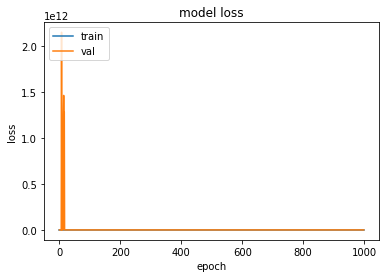

In [257]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

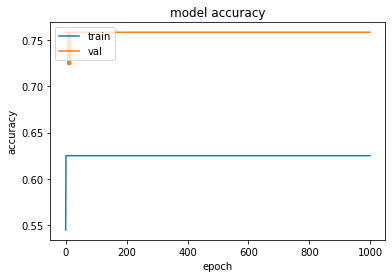

In [258]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [259]:
india_one_week_mat = [
                        [0.015834621,0.010025013,0.015868928,0.022212688,0.027071886,0.020451379,0.008974079],
                        [0.015848701,0.010033639,0.015862762,0.02220024,0.027068127,0.020445796,0.008969438],
                      ]

In [260]:
india_one_week_mat = np.array(india_one_week_mat)

In [261]:
india_one_week_mat = np.array([india_one_week_mat.T])

In [262]:
india_one_week_mat[0]

array([[0.01583462, 0.0158487 ],
       [0.01002501, 0.01003364],
       [0.01586893, 0.01586276],
       [0.02221269, 0.02220024],
       [0.02707189, 0.02706813],
       [0.02045138, 0.0204458 ],
       [0.00897408, 0.00896944]])

In [263]:
model.predict_proba(india_one_week_mat)

array([[0.60245264]], dtype=float32)

In [264]:
seed=0

In [265]:
def create_model():
  model = Sequential()
  model.add(LSTM(28, activation='relu', input_shape=(7, 2)))
  model.add(Dense(1, activation='sigmoid')) 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [266]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [267]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(train_x, train_y):
	model = create_model()
	model.fit(train_x[train], train_y[train], epochs=300, verbose=0)
	scores = model.evaluate(train_x[test], train_y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 58.62%
accuracy: 64.29%
accuracy: 57.14%
accuracy: 64.29%
accuracy: 57.14%
60.30% (+/- 3.30%)


In [268]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(train_x, train_y):
	model = create_model()
	model.fit(train_x[train], train_y[train], epochs=400, verbose=0)
	scores = model.evaluate(train_x[test], train_y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 66.67%
accuracy: 64.29%
accuracy: 57.14%
accuracy: 57.14%
accuracy: 57.14%
accuracy: 57.14%
accuracy: 64.29%
accuracy: 57.14%
accuracy: 35.71%
accuracy: 50.00%
56.67% (+/- 8.37%)
